# Residual plot


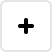
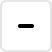
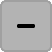
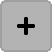
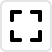
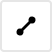
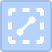
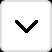
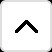
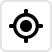

In [1]:
import numpy as np
import pandas as pd

from lets_plot import *
LetsPlot.setup_html()

from residual import *

In [2]:
def plot_matrix(plots=[], width=400, height=300, columns=2):
    bunch = GGBunch()
    for i in range(len(plots)):
        row = int(i / columns)
        column = i % columns
        bunch.add_plot(plots[i], column * width, row * height, width, height)
    return bunch.show()

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/JetBrains/lets-plot-docs/master/data/iris.csv")
print(df.shape)
df.head()

(150, 5)


sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

## Default plot

In [4]:
data = {
    'x': [0, 1, 2],
    'y': [0, 1, 4],
}
residual_plot(data, 'x', 'y')

In [5]:
residual_plot(df, "petal_length", "petal_width")

## Scatter plot (`method='none'`)

In [6]:
data = {
    'x': [0, 1, 2],
    'y': [0, 1, 4],
}
residual_plot(data, 'x', 'y', method='none')

In [7]:
residual_plot(df, "petal_length", "petal_width", method='none', hline=False, marginal='none') + theme_classic()

## Change geom type

In [8]:
data = {
    'x': [0, 1, 1],
    'y': [0, 1, 1],
}
residual_plot(data, 'x', 'y', geom='tile')

In [9]:
residual_plot(df, "petal_length", "petal_width", geom='tile', marginal="hist:tr")

In [10]:
data = {
    'x': [0, 1, 1, 2],
    'y': [0, 1, 1, 4],
}
residual_plot(data, 'x', 'y', geom='density2d')

In [11]:
residual_plot(df, "petal_length", "petal_width", geom='density2df', marginal="dens:tr")

## Change method

In [12]:
data = {
    'x': [0, 1, 2, 3, 4, 5],
    'y': [0, 1, 4, 0, 1, 4],
}
residual_plot(data, 'x', 'y', method='loess')

In [13]:
residual_plot(df, "petal_length", "petal_width", method='loess', span=.25, max_n=25)

## Geometries customization

In [14]:
residual_plot(df, "petal_length", "petal_width", size=5, color="#feb24c", alpha=1/3)

In [15]:
residual_plot(df, "petal_length", "petal_width", geom='none', color="black", hline=False) + \
    geom_hline(yintercept=0, color="black") + \
    geom_point(size=5, shape=21, color="black", fill="#feb24c")

In [16]:
residual_plot(df, "petal_length", "petal_width", hline=False, marginal='none') + \
    geom_smooth(method='loess', se=True, level=.99, seed=42)

## Marginal layers customization

In [17]:
residual_plot(df, "petal_length", "petal_width", marginal="box:lb:.03,hist:t:.4,hist:r", color="black") + \
    ggmarginal("tr", layer=geom_area(stat='density', color="magenta", fill="magenta", alpha=.1)) + \
    theme_minimal()

## Grouping

In [18]:
data = {
    'x': [0, 1, 2, 0, 1, 2],
    'y': [0, 2, 0, 0, -4, 0],
    'g': ['a', 'a', 'a', 'b', 'b', 'b'],
}
residual_plot(data, 'x', 'y', color_by='g')

In [19]:
residual_plot(df, "petal_length", "petal_width", color_by="species") + \
    facet_grid(y="species")

## Interaction with other layers

In [20]:
residual_plot(df, "petal_length", "petal_width", geom='tile', binwidth=[.4, .1], marginal='none') + \
    coord_fixed(ratio=.25, flip=True) + \
    theme(axis_ticks="blank", axis_text="blank", axis_line="blank")

In [21]:
residual_plot(df, "petal_length", "petal_width", color="white", binwidth=.1, marginal="hist:r") + \
    ylab("residual") + \
    theme_bw() + theme(text=element_text(family="monospace")) + \
    flavor_high_contrast_dark()

## Regression tests

In [22]:
tests = [
    {
        'data': {
            'x': [],
            'y': [],
        },
        'title': "Empty dataset",
    },
    {
        'data': {
            'x': [0, 1],
            'y': [0, 1],
        },
        'title': "Small dataset",
    },
    {
        'data': {
            'x': [0, 1, np.nan, 1],
            'y': [0, 1, 0, np.nan],
        },
        'title': "NaN's in data",
    },
    {
        'data': {
            'x': [0, 1, 0, 1],
            'y': [0, 1, 0, -1],
            'g': ['a', 'a', 'b', 'b'],
        },
        'color_by': 'g',
        'title': "color_by is OK",
    },
    {
        'data': {
            'x': [0, 1, np.nan],
            'y': [0, 1, np.nan],
            'g': ['a', 'a', 'b'],
        },
        'color_by': 'g',
        'title': "One of groups is empty",
    }
]

test = lambda i: (lambda p: tests[i][p] if p in tests[i] else None)

plot_matrix([
    residual_plot(test(i)('data'), 'x', 'y', color_by=test(i)('color_by')) + \
        ggtitle(test(i)('title'))
    for i in range(len(tests))
])